In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
data=pd.read_csv('/home/mohamed/Downloads/Compressed/Egypt_Houses_Price.csv')

In [35]:
data.shape

(27361, 12)

In [36]:
data.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [37]:
data.duplicated().sum()

np.int64(1591)

In [38]:
data=data.drop_duplicates()

In [39]:
data=data.dropna()

In [40]:
data.shape

(25148, 12)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25148 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25148 non-null  object
 1   Price           25148 non-null  object
 2   Bedrooms        25148 non-null  object
 3   Bathrooms       25148 non-null  object
 4   Area            25148 non-null  object
 5   Furnished       25148 non-null  object
 6   Level           25148 non-null  object
 7   Compound        25148 non-null  object
 8   Payment_Option  25148 non-null  object
 9   Delivery_Date   25148 non-null  object
 10  Delivery_Term   25148 non-null  object
 11  City            25148 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [42]:
data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


   Price        Bedrooms    Bathrooms      Area     Level    

In [43]:
data['Price']=data['Price'].astype(str)
data['Bedrooms']=data['Bedrooms'].astype(str)
data['Bathrooms']=data['Bathrooms'].astype(str)
data['Area']=data['Area'].astype(str)
data['Level']=data['Level'].astype(str)

In [44]:
data['Bedrooms']=data['Bedrooms'].str.replace('10+','11')


In [45]:
data['Bathrooms']=data['Bathrooms'].str.replace('10+','11')


In [46]:
#Unknown
Unknown_data=data['Price'].str.contains('Unknown')


In [47]:
data=data[~Unknown_data]

In [48]:
data['Price']=data['Price'].astype(float)

In [49]:
data['Price']=data['Price'].astype(float)

In [50]:
text=data['Area'].str.contains('[a-zA-Z]')
data[text]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City


In [51]:
data=data[~text]

In [52]:
data['Area']=data['Area'].astype(float)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25143 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            25143 non-null  object 
 1   Price           25143 non-null  float64
 2   Bedrooms        25143 non-null  object 
 3   Bathrooms       25143 non-null  object 
 4   Area            25143 non-null  float64
 5   Furnished       25143 non-null  object 
 6   Level           25143 non-null  object 
 7   Compound        25143 non-null  object 
 8   Payment_Option  25143 non-null  object 
 9   Delivery_Date   25143 non-null  object 
 10  Delivery_Term   25143 non-null  object 
 11  City            25143 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.5+ MB


In [54]:
data.shape

(25143, 12)

<Axes: xlabel='Area', ylabel='Count'>

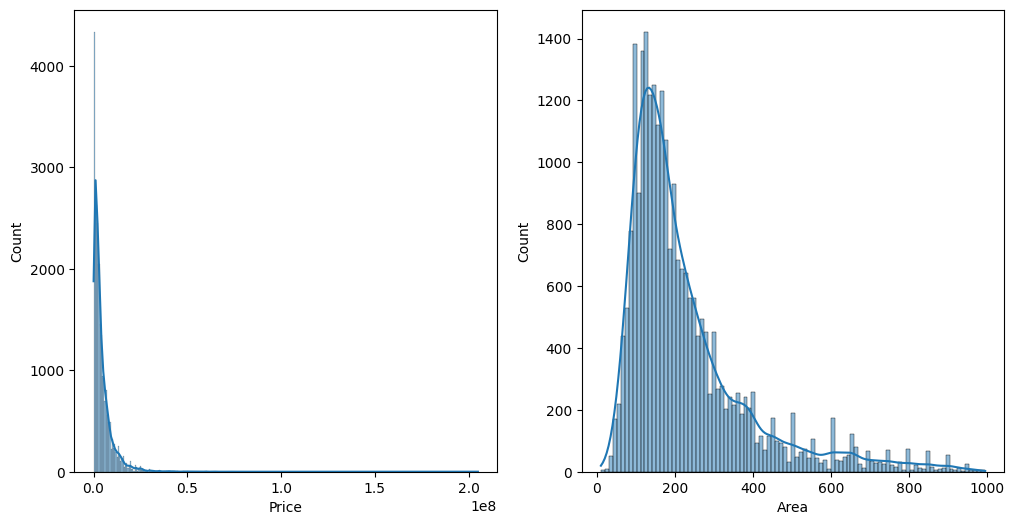

In [55]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
sns.histplot(data['Price'],ax=axes[0],kde=True)
sns.histplot(data['Area'],ax=axes[1],kde=True)

# Summary: Both Price and Area exhibit a strong right-skewed distribution.
# High variance in Price (STD > Mean) and a significant gap between Median and Max 
# indicate the presence of extreme outliers (luxury properties). Studio Chalet

In [56]:
filtered_units = data[(data['Area'] < 50) & (~data['Type'].isin(['Studio', 'Chalet']))]
filtered_units

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
985,Apartment,1296000.0,1.0,1.0,36.0,Yes,9,Unknown,Cash or Installment,Unknown,Finished,New Capital City
1853,Apartment,1291500.0,2,1,41.0,Unknown,4,Unknown,Installment,Unknown,Finished,New Capital City
2280,Apartment,3200000.0,4,1,20.0,No,4,Unknown,Cash or Installment,2024,Finished,New Capital City
5082,Apartment,130000.0,1,1,40.0,Unknown,3,Unknown,Cash,Ready to move,Finished,Seyouf
5313,Apartment,350000.0,1,1,42.0,No,6,Unknown,Cash,Ready to move,Finished,Mansura
5409,Apartment,529000.0,1,1,46.0,No,3,Unknown,Installment,2023,Finished,Hurghada
5428,Apartment,235000.0,1,1,47.0,No,4,Unknown,Cash,Unknown,Semi Finished,Hurghada
5960,Apartment,1291500.0,2,1,41.0,No,10+,Unknown,Installment,2025,Unknown,New Capital City
6990,Apartment,1128000.0,3,2,14.0,No,3,Beit Al Watan,Installment,soon,Unknown,New Cairo - El Tagamoa
7345,Apartment,1500000.0,3,3,10.0,No,4,Unknown,Unknown Payment,Ready to move,Unknown,New Cairo - El Tagamoa


In [57]:
data = data.drop(filtered_units.index)


In [58]:
# السعر أقل من 500 ألف، المساحة أكبر من 100، والنوع ليس شاليه
filter2 = data[(data['Price'] < 500000) & (data['Area'] > 100) & (data['Type'] != 'Chalet')]
filter2

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
10,Apartment,309825.0,4.0,3.0,153.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
15,Apartment,480000.0,3.0,3.0,167.0,Unknown,3,90 Avenue,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
50,Apartment,362000.0,3.0,3.0,160.0,Unknown,2,Mountain View iCity,Cash or Installment,Ready to move,Unknown,New Cairo - El Tagamoa
68,Duplex,335000.0,5.0,2.0,189.0,No,5,Unknown,Cash,Ready to move,Not Finished,Damietta City
102,Apartment,370000.0,3.0,2.0,130.0,Unknown,3,Unknown,Cash or Installment,Ready to move,Not Finished,Dar al-Salaam
...,...,...,...,...,...,...,...,...,...,...,...,...
27132,Stand Alone Villa,225000.0,4.0,4.0,303.0,No,Unknown,Azzar,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
27184,Stand Alone Villa,400000.0,4.0,2.0,193.0,No,Unknown,Unknown,Cash or Installment,Unknown,Unknown,New Cairo - El Tagamoa
27247,Town House,300000.0,4.0,4.0,220.0,Unknown,Unknown,Mountain View 2,Cash or Installment,2025,Not Finished,New Cairo - El Tagamoa
27330,Town House,429000.0,4.0,4.0,220.0,Yes,Unknown,Unknown,Cash or Installment,2025,Finished,New Cairo - El Tagamoa


In [59]:
filter2.shape

(1438, 12)

In [60]:
filter2.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
10,Apartment,309825.0,4.0,3.0,153.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
15,Apartment,480000.0,3.0,3.0,167.0,Unknown,3,90 Avenue,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
50,Apartment,362000.0,3.0,3.0,160.0,Unknown,2,Mountain View iCity,Cash or Installment,Ready to move,Unknown,New Cairo - El Tagamoa
68,Duplex,335000.0,5.0,2.0,189.0,No,5,Unknown,Cash,Ready to move,Not Finished,Damietta City
102,Apartment,370000.0,3.0,2.0,130.0,Unknown,3,Unknown,Cash or Installment,Ready to move,Not Finished,Dar al-Salaam


In [61]:
filter2['Type'].value_counts()

Type
Apartment            976
Town House           201
Stand Alone Villa     94
Duplex                90
Twin House            37
Penthouse             17
Twin house            14
Standalone Villa       8
Studio                 1
Name: count, dtype: int64

In [62]:
data=data.drop(filter2.index)

In [63]:
filter2.shape

(1438, 12)

In [64]:

data['Bedrooms']=data['Bedrooms'].astype(float)
data['Bathrooms']=data['Bathrooms'].astype(float)




In [65]:
data=data.drop(columns='Compound')

In [66]:
data_num=data.select_dtypes('number')
data_object=data.select_dtypes('object')

In [67]:
for x in data_object.columns:
    values=data_object[x].value_counts()
    print(values)
    print('-------------------------')


Type
Apartment            7097
Chalet               6046
Stand Alone Villa    3759
Town House           2685
Twin House           1658
Duplex                727
Standalone Villa      550
Penthouse             488
Twin house            443
Studio                227
Name: count, dtype: int64
-------------------------
Furnished
No         14389
Unknown     7191
Yes         2100
Name: count, dtype: int64
-------------------------
Level
Unknown    8995
Ground     4160
1          3260
2          3153
3          1747
4           790
5           477
10+         243
6           195
7           192
Highest     163
8           113
9            98
10           94
Name: count, dtype: int64
-------------------------
Payment_Option
Cash or Installment    9056
Cash                   8530
Installment            3479
Unknown Payment        2615
Name: count, dtype: int64
-------------------------
Delivery_Date
Ready to move      10793
Unknown             8245
soon                1455
2024                

In [68]:
data_num.describe()

,Price,Bedrooms,Bathrooms,Area
count,2.368000e+04,23680.000000,23680.000000,23680.000000
mean,4.698119e+06,3.227238,2.803167,231.944764
std,5.723500e+06,1.178883,1.302467,161.682594
min,3.000000e+04,1.000000,1.000000,10.000000
25%,1.355000e+06,3.000000,2.000000,125.000000
50%,2.900000e+06,3.000000,3.000000,180.000000
75%,6.000000e+06,4.000000,4.000000,280.000000
max,2.050000e+08,11.000000,11.000000,995.000000


In [69]:
data.shape

(23680, 11)

In [70]:
data_num['Price']=data_num['Price'].apply(np.log)

In [71]:
data_num['Area']=data_num['Area'].apply(np.log)

In [72]:
data_num.describe()

,Price,Bedrooms,Bathrooms,Area
count,23680.000000,23680.000000,23680.000000,23680.000000
mean,14.814155,3.227238,2.803167,5.253362
std,1.110086,1.178883,1.302467,0.605757
min,10.308953,1.000000,1.000000,2.302585
25%,14.119312,3.000000,2.000000,4.828314
50%,14.880221,3.000000,3.000000,5.192957
75%,15.607270,4.000000,4.000000,5.634790
max,19.138521,11.000000,11.000000,6.902743


In [73]:
for x in data_object.columns:
    values=data_object[x].nunique()
    print(values)
    print(x)
    print('-------------------------')
    

10
Type
-------------------------
3
Furnished
-------------------------
14
Level
-------------------------
4
Payment_Option
-------------------------
10
Delivery_Date
-------------------------
5
Delivery_Term
-------------------------
176
City
-------------------------


In [74]:
from category_encoders import BinaryEncoder as ce

In [75]:
encoder=ce(cols=data_object.columns)

In [76]:
data_object=encoder.fit_transform(data_object)

In [77]:
data_object.head()

,Type_0,Type_1,Type_2,Type_3,Furnished_0,Furnished_1,Level_0,Level_1,Level_2,Level_3,...,Delivery_Term_1,Delivery_Term_2,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,1
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


In [78]:
df = pd.concat([data_num, data_object], axis=1)

In [79]:
df.shape

(23680, 32)

In [92]:
df.columns

Index(['Price', 'Bedrooms', 'Bathrooms', 'Area', 'Type_0', 'Type_1', 'Type_2',
       'Type_3', 'Furnished_0', 'Furnished_1', 'Level_0', 'Level_1', 'Level_2',
       'Level_3', 'Payment_Option_0', 'Payment_Option_1', 'Payment_Option_2',
       'Delivery_Date_0', 'Delivery_Date_1', 'Delivery_Date_2',
       'Delivery_Date_3', 'Delivery_Term_0', 'Delivery_Term_1',
       'Delivery_Term_2', 'City_0', 'City_1', 'City_2', 'City_3', 'City_4',
       'City_5', 'City_6', 'City_7'],
      dtype='object')

In [80]:
x=df.drop(columns='Price')
y=df['Price']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression
modul_liner=LinearRegression()
modul_liner.fit(x_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [84]:
y_predect=modul_liner.predict(x_test)


In [85]:
from sklearn.metrics import r2_score

In [86]:
r2=r2_score(y_test,y_predect)
r2

0.5286882474068897

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error

# 1. بناء وتدريب النموذج (مع تحديد random_state لضمان ثبات النتائج)
model_rf = RandomForestRegressor(n_estimators=200, random_state=42,max_depth=20,min_samples_split=5)
model_rf.fit(x_train, y_train)

# 2. التنبؤ بالقيم الجديدة
y_predict_rf = model_rf.predict(x_test)

# 3. حساب معامل التحديد R-squared
r2_rf = r2_score(y_test, y_predict_rf)
print(f"Random Forest R2 Score: {r2_rf}")
rmse=mean_squared_error(y_test, y_predict_rf)


Random Forest R2 Score: 0.6325631655636634


In [94]:
rmse

0.4582089147223402

In [96]:
# أولًا تأكد إن مكتبة XGBoost متسطبة
# !pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1️⃣ بناء وتدريب النموذج
model_xgb = XGBRegressor(
    n_estimators=400,    # عدد الأشجار
    max_depth=5,         # عمق كل شجرة
    learning_rate=0.05,  # سرعة التعلم
    subsample=0.8,       # عينة من البيانات لكل شجرة
    colsample_bytree=0.8,
    random_state=42
)

model_xgb.fit(x_train, y_train)

# 2️⃣ التنبؤ بالقيم الجديدة
y_predict_xgb = model_xgb.predict(x_test)

# 3️⃣ حساب المقاييس
r2 = r2_score(y_test, y_predict_xgb)
mae = mean_absolute_error(y_test, y_predict_xgb)
mse = mean_squared_error(y_test, y_predict_xgb)
rmse = np.sqrt(mse)

print(f"XGBoost R2 Score: {r2:.4f}")
print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")


XGBoost R2 Score: 0.6318
XGBoost MAE: 0.5034
XGBoost MSE: 0.4592
XGBoost RMSE: 0.6777
